In [1]:
%load_ext load_style
%load_style talk.css

# Iris and Cartopy

[iris](http://scitools.org.uk/iris/index.html) and [cartopy](http://scitools.org.uk/cartopy/index.html) are developed by the [UK Met. Office](http://scitools.org.uk/).

+ [iris](http://scitools.org.uk/iris/index.html) is a Python package for analysing and visualising meteorological and oceanographic data sets
+ [cartopy](http://scitools.org.uk/cartopy/index.html) is a Python package for advanced map generation with a simple matplotlib interface.
<br>
<br>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
%matplotlib inline

In [4]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [5]:
import iris

In [6]:
import cartopy.crs as ccrs

In [7]:
import iris.quickplot as qplt

### loading one day of Tropical Rainfall Measurement Mission (TRMM) rainfall (mm)

In [8]:
!ls ../data/

3B42RT_daily.2014.07.23.nc   SOI_time_series.xlsx         scaler_sst.pkl
Daily_clim_data_Auckland.csv dset_from_dict.nc            soi_nino.csv
EOF.pkl                      ersst.realtime.nc            sst_nino3.dat
ISO_datetime.xls             ersst3b.nino.mth.81-10.ascii year_month_day.xlsx
NIWA_SOI.csv                 ersst_anoms.nc


In [9]:
date = dt.datetime(2014,07,23)

In [10]:
fname = '../data/3B42RT_daily.{}.nc'.format(date.strftime("%Y.%m.%d"))

In [11]:
trmm = iris.load_cube(fname)

In [14]:
print(trmm)

trmm / (unknown)                    (time: 1; latitude: 240; longitude: 420)
     Dimension coordinates:
          time                           x            -               -
          latitude                       -            x               -
          longitude                      -            -               x
     Attributes:
          title: saved netcdf variable


In [16]:
lats = trmm.coord('latitude').points
lons = trmm.coord('longitude').points

In [17]:
lats

array([-49.875, -49.625, -49.375, -49.125, -48.875, -48.625, -48.375,
       -48.125, -47.875, -47.625, -47.375, -47.125, -46.875, -46.625,
       -46.375, -46.125, -45.875, -45.625, -45.375, -45.125, -44.875,
       -44.625, -44.375, -44.125, -43.875, -43.625, -43.375, -43.125,
       -42.875, -42.625, -42.375, -42.125, -41.875, -41.625, -41.375,
       -41.125, -40.875, -40.625, -40.375, -40.125, -39.875, -39.625,
       -39.375, -39.125, -38.875, -38.625, -38.375, -38.125, -37.875,
       -37.625, -37.375, -37.125, -36.875, -36.625, -36.375, -36.125,
       -35.875, -35.625, -35.375, -35.125, -34.875, -34.625, -34.375,
       -34.125, -33.875, -33.625, -33.375, -33.125, -32.875, -32.625,
       -32.375, -32.125, -31.875, -31.625, -31.375, -31.125, -30.875,
       -30.625, -30.375, -30.125, -29.875, -29.625, -29.375, -29.125,
       -28.875, -28.625, -28.375, -28.125, -27.875, -27.625, -27.375,
       -27.125, -26.875, -26.625, -26.375, -26.125, -25.875, -25.625,
       -25.375, -25.

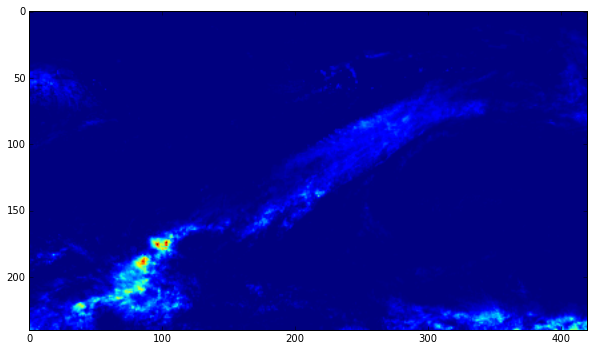

In [18]:
plt.imshow(trmm[0].data)

## quick and dirty mapping using the cartopy `qplt` function

In [19]:
proj = ccrs.PlateCarree(central_longitude=-180.0)

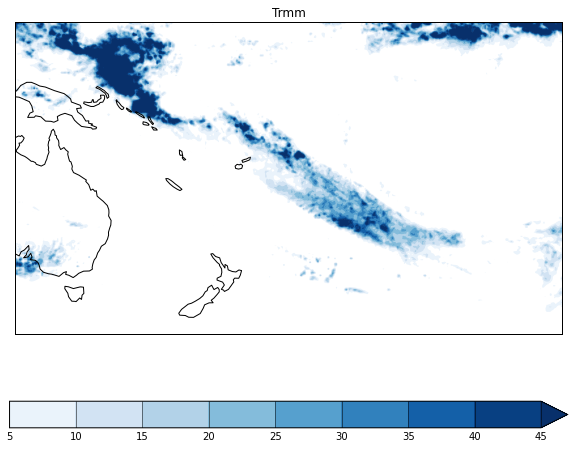

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=proj)
ax.coastlines()

qplt.contourf(trmm[0],  np.arange(5,50,5), cmap=plt.get_cmap('Blues'), extend='max')

plt.show()

## if you want more control, use the `matplotlib` interface

The line below makes accessible some `features` that you may want to add to your map  

see [The cartopy Feature interface doc](http://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html) for more information

In [21]:
import cartopy.feature as cfeature 

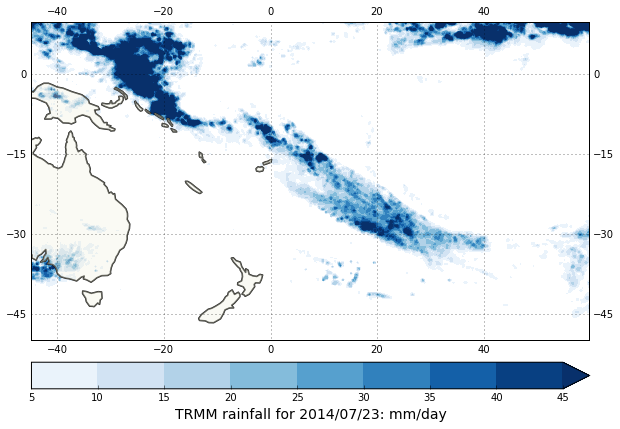

In [22]:
f = plt.figure()

ax = plt.axes(projection=proj)

im = ax.contourf(lons, lats, trmm[0].data, np.arange(5,50,5),
             transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Blues'), extend='max')

ax.coastlines(linewidth=1.5)
ax.gridlines(crs=proj, draw_labels=True)
cb = plt.colorbar(im, orientation='horizontal', pad=0.05)
cb.set_label('TRMM rainfall for {}: mm/day'.format(date.strftime('%Y/%m/%d')), fontsize=14)

ax.add_feature(cfeature.LAND, alpha=0.3); 

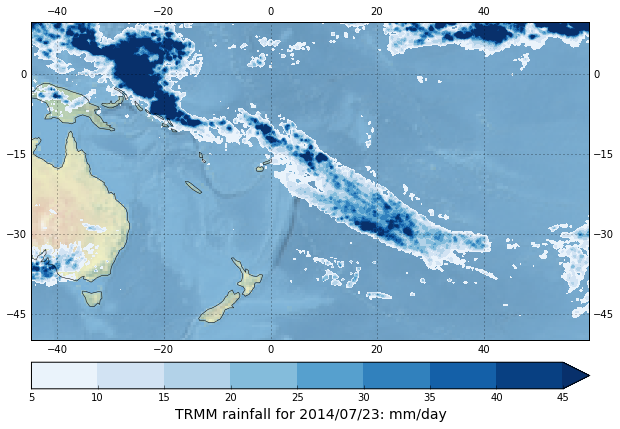

In [23]:
f = plt.figure()

ax = plt.axes(projection=proj)

im = ax.contourf(lons, lats, trmm[0].data, np.arange(5,50,5),
             transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Blues'), extend='max')

ax.coastlines(lw=0.5)
ax.gridlines(crs=proj, draw_labels=True)
cb = plt.colorbar(im, orientation='horizontal', pad=0.05)
cb.set_label('TRMM rainfall for {}: mm/day'.format(date.strftime('%Y/%m/%d')), fontsize=14)

ax.stock_img()